In [37]:
#BINARY CLASSES ONLY

import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [38]:
#loading the 1st image from the normal folder of the dataset
img = image.load_img("D:/For Learning/Classification/Covid-19/Dataset/normal/IM-0115-0001.jpeg")

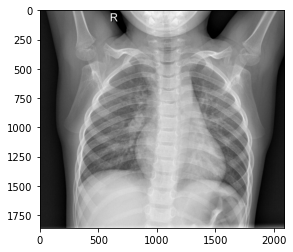

In [39]:
plt.imshow(img)

In [40]:
#getting the shape of the 1st image from the normal folder of the dataset
cv2.imread("D:/For Learning/Classification/Covid-19/Dataset/normal/IM-0115-0001.jpeg").shape

(1858, 2090, 3)

In [41]:
#rescaling all the images
training = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [42]:
training_dataset = training.flow_from_directory('D:/For Learning/Classification/Covid-19/Dataset/training',
                                               target_size= (300,300),
                                               batch_size= 3,
                                               class_mode='binary')

validation_dataset = validation.flow_from_directory('D:/For Learning/Classification/Covid-19/Dataset/validation',
                                               target_size= (300,300),
                                               batch_size= 3,
                                               class_mode='binary')

Found 48 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [43]:
training_dataset.class_indices

{'covid': 0, 'normal': 1}

In [44]:
#showing up the images classes of the training folder
training_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [45]:
#building the model with sequential type
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    
                                    tf.keras.layers.Dense(1, activation='sigmoid')
]
)

In [46]:
#compiling the model using accuracy to measure model performance
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=0.001), metrics = ['accuracy'])

In [47]:
#training the model
model_fit = model.fit(training_dataset,
                     steps_per_epoch = 3,
                     epochs = 20 ,
                     validation_data = validation_dataset)

Epoch 1/20
3/3 [==============================] - 3s 1s/step - loss: 8.8669 - accuracy: 0.2222 - val_loss: 0.6535 - val_accuracy: 0.6667
Epoch 2/20
3/3 [==============================] - 3s 1s/step - loss: 0.6804 - accuracy: 0.7778 - val_loss: 0.6243 - val_accuracy: 0.6667
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 1.2419 - accuracy: 0.7778 - val_loss: 0.5850 - val_accuracy: 0.6111
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 0.5265 - accuracy: 0.7778 - val_loss: 0.5806 - val_accuracy: 0.5556
Epoch 5/20
3/3 [==============================] - 3s 984ms/step - loss: 0.1850 - accuracy: 0.8889 - val_loss: 0.6074 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 0.3587 - accuracy: 0.8889 - val_loss: 0.4807 - val_accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 3s 876ms/step - loss: 0.1890 - accuracy: 1.0000 - val_loss: 4.6512 - val_accuracy: 0.6667
Epoch 8/20
3/3 [===================

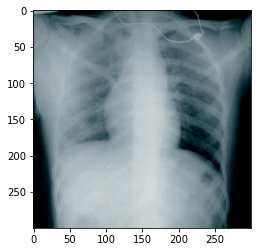

normal


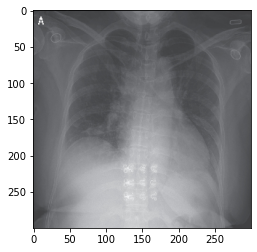

covid-19


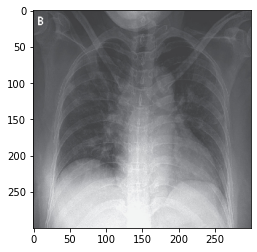

covid-19


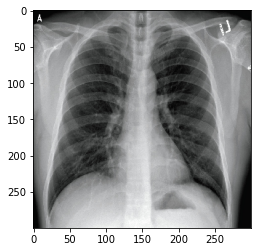

covid-19


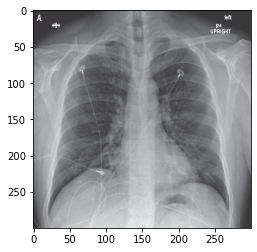

covid-19


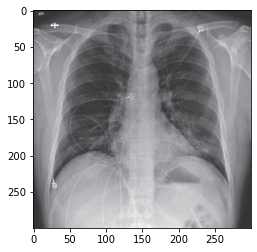

normal


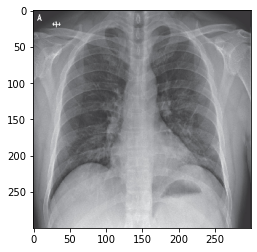

covid-19


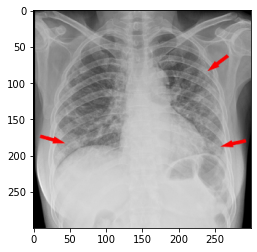

normal


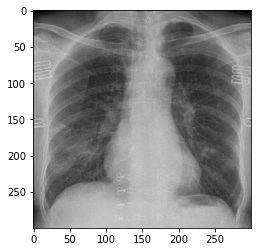

normal


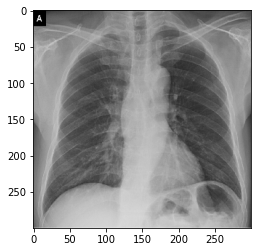

covid-19


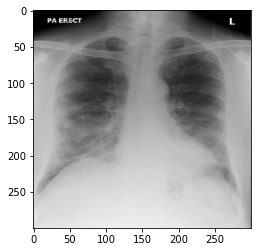

covid-19


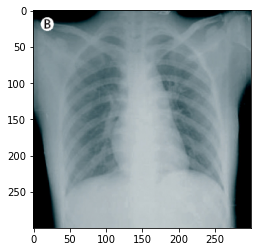

covid-19


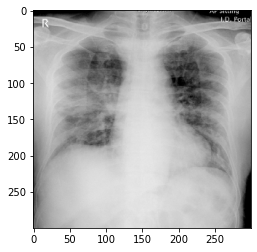

covid-19


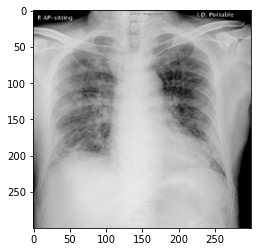

covid-19


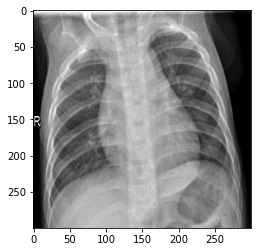

normal


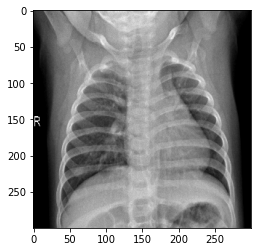

normal


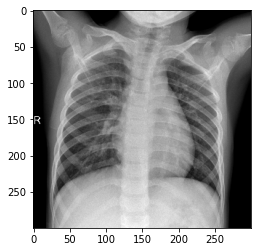

normal


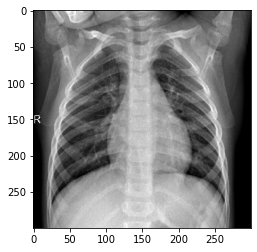

normal


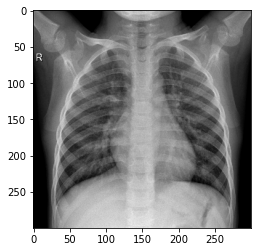

normal


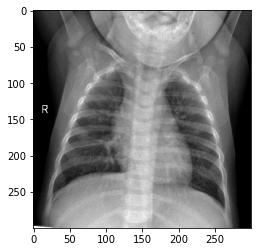

normal


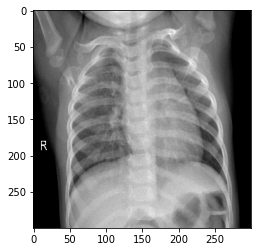

normal


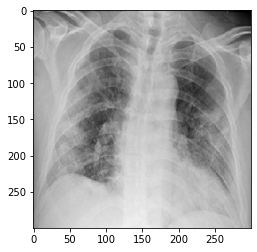

normal


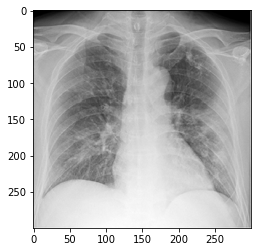

normal


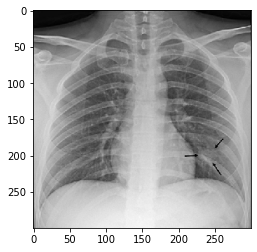

normal


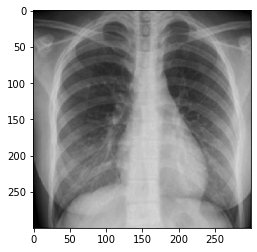

normal


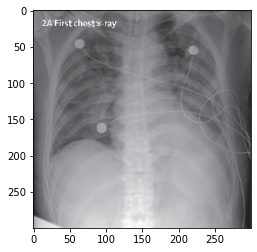

covid-19


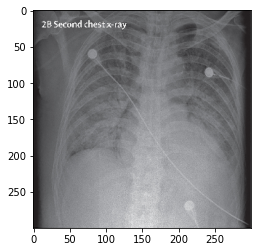

covid-19


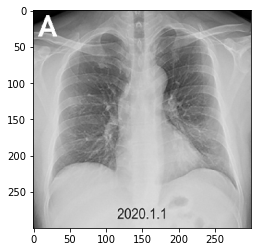

covid-19


In [48]:
#testing (predicting) the model
path = 'D:/For Learning/Classification/Covid-19/Dataset/testing'

for i in os.listdir(path):
    img = image.load_img(path+'/'+i,target_size=(300,300,3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    valeur = model.predict(images)
    if valeur == 0 : 
        print("covid-19")
    else: 
        print("normal")
